In [1]:
# imports
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
# lendo dataset (diponível no GitHub) **
url = 'https://raw.githubusercontent.com/MpRonald/datasets/main/ratings.csv'
data = pd.read_csv(url)
data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [4]:
data.shape

(100836, 4)

In [37]:
data = data.sample(n=5000, random_state=159)
data.shape

(5000, 5)

In [38]:
data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'cluster'], dtype='object')

In [39]:
data.describe()

,userId,movieId,rating,timestamp,cluster
count,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000
mean,329.599200,19534.416400,3.50770,1.205885e+09,1.048400
std,182.597546,35798.462948,1.04848,2.174186e+08,0.819873
min,1.000000,1.000000,0.50000,8.281246e+08,0.000000
25%,181.000000,1145.000000,3.00000,1.015375e+09,0.000000
50%,328.000000,2987.000000,3.50000,1.186087e+09,1.000000
75%,480.000000,8128.000000,4.00000,1.435997e+09,2.000000
max,610.000000,193585.000000,5.00000,1.537632e+09,2.000000


In [40]:
data.userId.value_counts()

414    132
474    120
599    113
448     94
274     82
      ... 
130      1
579      1
35       1
242      1
72       1
Name: userId, Length: 557, dtype: int64

In [41]:
data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
cluster      0
dtype: int64

In [42]:
data.duplicated().sum()

0

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 14750 to 41969
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   int64  
 1   movieId    5000 non-null   int64  
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   int64  
 4   cluster    5000 non-null   int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 214.8 KB


In [44]:
# creating model
kmeans = KMeans(n_clusters = 3, random_state = 159).fit(data)

In [45]:
kmeans.labels_

array([1, 2, 1, ..., 0, 2, 2], dtype=int32)

In [46]:
# creating a Cluster map
cm = pd.DataFrame(data)
cm['cluster'] = kmeans.labels_

In [47]:
cm

,userId,movieId,rating,timestamp,cluster
14750,93,552,5.0,942946340,1
27028,182,7022,4.5,1075742316,2
83442,530,329,3.0,843226768,1
84040,534,109850,4.0,1459789126,0
45513,300,6016,5.0,1425351465,0
...,...,...,...,...,...
11791,72,1221,4.5,1217324698,2
85804,555,3573,1.0,978842188,1
99798,610,4022,3.5,1493844852,0
30633,215,608,3.5,1260908847,2


In [48]:
for i in range(0,3):
  print(f'Cluter = {i}: | Nº de Cluster:{len(cm[cm.cluster == i])}')

Cluter = 0: | Nº de Cluster:1806
Cluter = 1: | Nº de Cluster:1629
Cluter = 2: | Nº de Cluster:1565


In [49]:
# reducing dimensionality
pca = PCA(n_components = 2).fit(data)

In [50]:
# applying dimensonality
pca_2d = pca.transform(data)

In [51]:
pca_2d

array([[ 2.62938710e+08,  2.94808755e+03],
       [ 1.30142734e+08, -1.65780292e+03],
       [ 3.62658282e+08,  1.10420855e+04],
       ...,
       [-2.87959800e+08, -3.95298187e+04],
       [-5.50237960e+07, -2.35156493e+04],
       [ 9.56551985e+07, -1.13882699e+04]])

In [52]:
pca_2d.shape

(5000, 2)

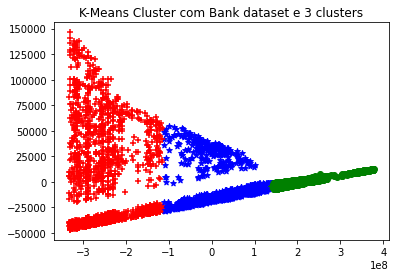

In [53]:
# generating 'labels' to clusters results
for i in range(0, pca_2d.shape[0]):
  if kmeans.labels_[i] == 0:
    c1 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
  elif kmeans.labels_[i] == 1:
    c2 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
  elif kmeans.labels_[i] == 2:
    c3 = pl.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')

  # pl.legend([c1,c2,c3], ['Cluster 0', 'Cluster 1', 'Cluster 2'])
  pl.title("K-Means Cluster com Bank dataset e 3 clusters")
pl.show()